In [1]:
import urllib
import requests
from IPython.core.display import HTML
def css_styling():
    styles = requests.get('https://raw.githubusercontent.com/saadtony/NumericalMethods/master/styles/custom.css')
    return HTML(styles.text)
css_styling()

# Linear Advection with Finite Differences
## Taken from Tony Saad's CHEN 6355 CFD course at University of Utah
**Adapted by Matt Williams (<a>matt.williams@alum.mit.edu</a>)**
<hr/>

This notebook will solve the linear advection equation with periodic boundary conditions:

$$\begin{equation}
\frac{\partial u}{\partial t} = - c \frac{\partial u}{\partial x}
\end{equation}$$

subject to the initial condition $u(x,0)\equiv u_0(x)$. The exact solution is:

$$\begin{equation}
u(x, t) = u_0(x-ct)
\end{equation}$$

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
%matplotlib inline
import matplotlib.animation as animation

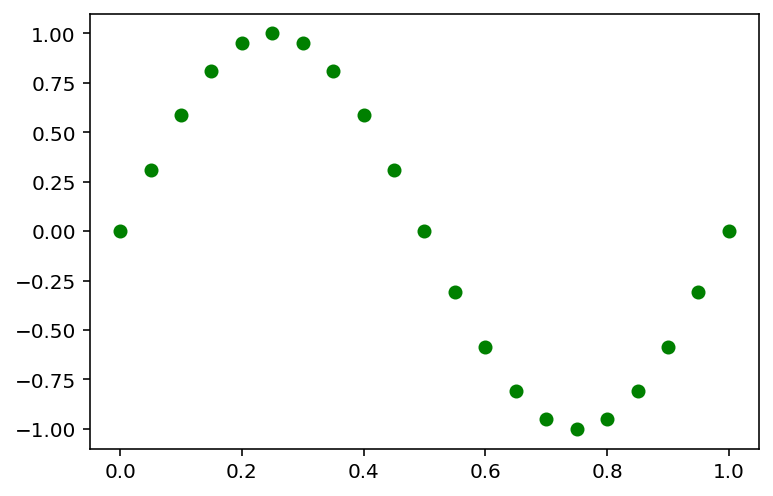

In [6]:
# Initial condition
Lx = 1.
nx = 21
dx = Lx/(nx-1)
x = np.linspace(0, Lx, nx)
u0 = np.sin(2.*np.pi*x)
plt.plot(x, u0,'go')

## Forward in Time, Centered in Space (FTCS)
$$u^{n+1}_{i}\  =\  u^{n}_{i}\  -\  c\Delta t\frac{u^{n}_{i+1\  -}u^{n}_{i-1}}{2\Delta x}$$

In [9]:
dt = 0.01         # sec
t_end = 3.        # sec
c = 1.            # wave speed, m/s
cfl = c*dt/2/dx   # CFL number

sol = []
sol.append(u0)
t = 0.

while t < t_end:
    un = sol[-1]
    unew = np.copy(un)
    # Interior nodes
    unew[1:-1] = un[1:-1] - cfl*(un[2:]-un[:-2])
    # Periodic boundary condition, u[i+1] = u[1] at right boundary
    unew[-1] = un[-1] - cfl*(un[1]-un[-2])
    unew[0] = unew[-1]
    sol.append(unew)
    t += dt

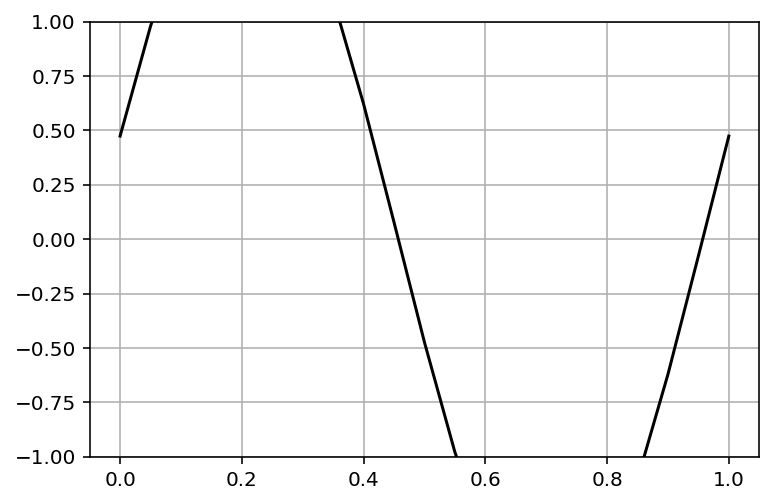

In [17]:
ims = []
fig = plt.figure()
plt.grid()

i = 0
for solution in sol:
    if (i%1==0):
        im = plt.plot(x, solution, 'k-', animated=True)
        plt.ylim(-1,1)
        ims.append(im)
    i += 1
ani = animation.ArtistAnimation(fig, ims, interval=35, blit=True, repeat_delay=1000)
ani.save('fcts_2.mp4')

In [18]:
%%HTML
<video width="640" height="480" controls>
    <source src="fcts_2.mp4" type="video/mp4">
</video>

The amplitude of the advected quantity begins to grow without bound, despite having an acceptable CFL number.

In [19]:
cfl

0.09999999999999999

From the notes on the Microsoft Surface, the numerical discretization introduces a numerical diffusion term:

$$-\frac{\Delta t}{2} c^{2}u^{\prime \prime }$$

The negative diffusion term causes the expression to "blow up" instead of diffusing. Instead of using a centered difference, we can use a backward difference. This reduces the order of accuracy, but it will prevent the numerical diffusion and the solution won't explode.

# Forward in Time, Backward in Space (Upwind, FTUS)
$$u^{n+1}_{i}=u^{n}_{i}-c\Delta t\frac{u^{n}_{i}-u^{n}_{i-1}}{\Delta x}$$

In [57]:
t_end = 3.        # sec
c = 1.            # wave speed, m/s
dt = 0.9*dx/c 
cfl = c*dt/dx     # CFL number

sol = []
sol.append(u0)
t = 0.

while t < t_end:
    un = sol[-1]
    unew = np.copy(un)
    # Interior nodes
    unew[1:-1] = un[1:-1] - cfl*(un[1:-1]-un[:-2])
    # Periodic boundary condition, u[i+1] = u[1] at right boundary
    unew[-1] = un[-1] - cfl*(un[-1]-un[-2])
    unew[0] = unew[-1]
    sol.append(unew)
    t += dt

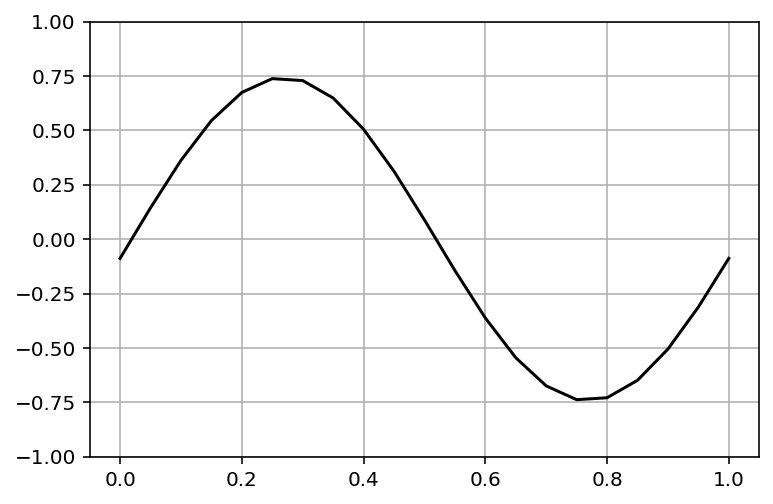

In [58]:
ims = []
fig = plt.figure()
plt.grid()

i = 0
for solution in sol:
    if (i%1==0):
        im = plt.plot(x, solution, 'k-', animated=True)
        plt.ylim(-1,1)
        ims.append(im)
    i += 1
ani = animation.ArtistAnimation(fig, ims, interval=35, blit=True, repeat_delay=1000)
ani.save('ftus.mp4')

In [60]:
%%HTML
<video width="640" height="480" controls>
    <source src="ftus.mp4" type="video/mp4">
</video>

Now the solution is shrinking, but it is stable. Per the notes in the Surface, the numerical diffusion term will be positive so long as $\Delta x-c\Delta t>0$, or $\Delta x>c\Delta t$.

In [61]:
dx-c*dt # check numerical diffusion coefficient

0.0049999999999999975

Additionally, if we set $\Delta x-c\Delta t=0$, there is no numerical diffusion, and we get an exact solution.

In [62]:
dx

0.05